In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(17,5)

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns = ['Month','Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.shape

(107, 2)

In [6]:
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(106,axis=0,inplace=True)

In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.shape

(105, 2)

In [11]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
df.set_index('Month', inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [17]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


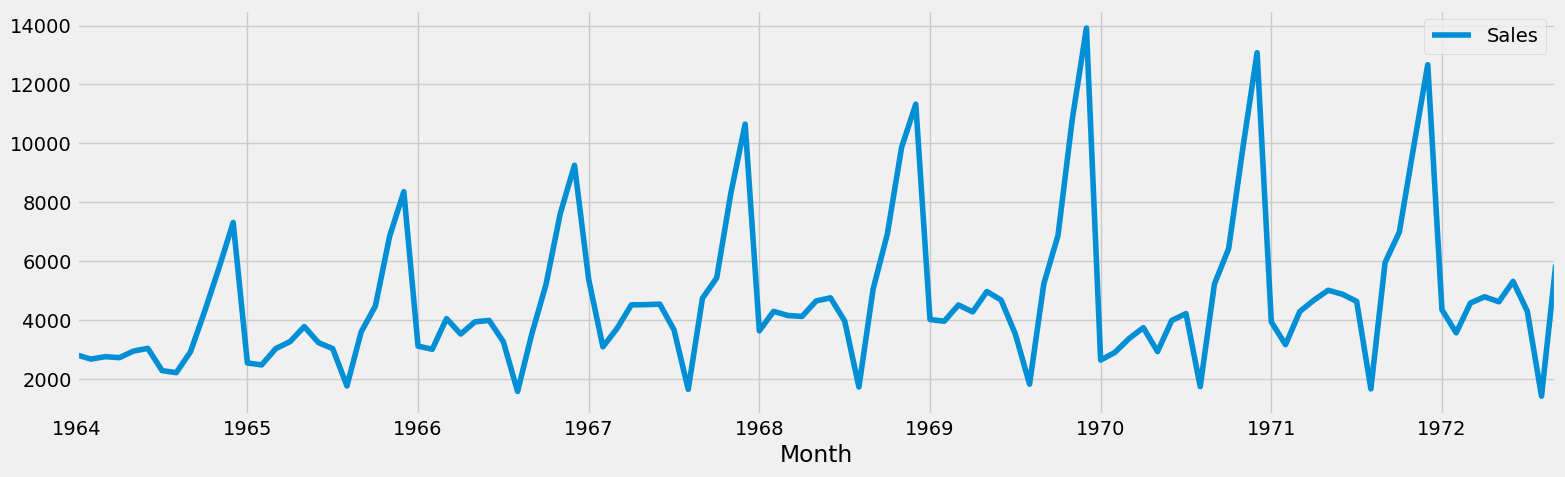

In [18]:
df.plot();

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(df['Sales'])

(-1.8335930563276188,
 0.363915771660247,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [21]:
def adfuller_test(sales):
    result=adfuller(sales)
    label=['ADF test statistics','p-value','Lags used','Number of obs used']
    
    for value,label in zip(result,label):
        print('{} : {}'.format(label,value))
    
    if result[1]<0.05:
        print('Strong evidence againts null hypo, reject the null hypo & data is stationary')
    else:
        print('Weak evidence againts null hypo, accept the null hypo & data is not stationary')

In [22]:
adfuller_test(df['Sales'])

ADF test statistics : -1.8335930563276188
p-value : 0.363915771660247
Lags used : 11
Number of obs used : 93
Weak evidence againts null hypo, accept the null hypo & data is not stationary


In [23]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [24]:
df['Sales']

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

In [25]:
df['Sale_first_diff']=df['Sales']-df['Sales'].shift(1)

In [26]:
df.head()

,Sales,Sale_first_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [27]:
df['Seasonal first diff']=df['Sales']-df['Sales'].shift(12)

In [28]:
df.head()

,Sales,Sale_first_diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [29]:
adfuller_test(df['Seasonal first diff'].dropna())

ADF test statistics : -7.626619157213166
p-value : 2.0605796968136632e-11
Lags used : 0
Number of obs used : 92
Strong evidence againts null hypo, reject the null hypo & data is stationary


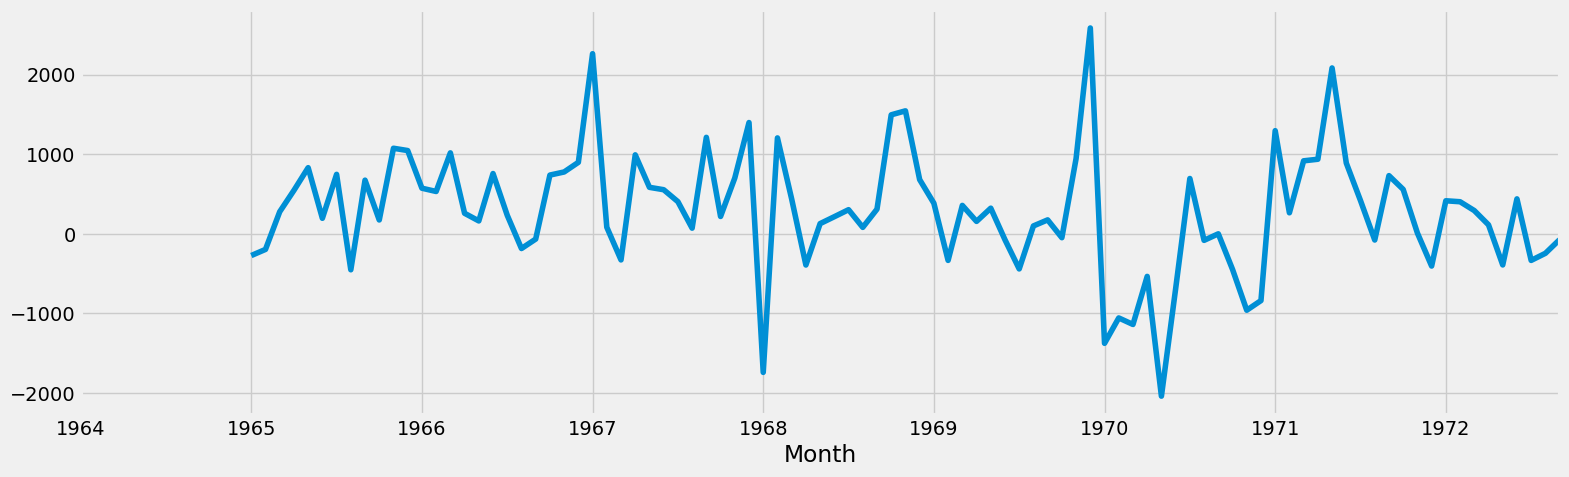

In [30]:
df['Seasonal first diff'].plot();

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [32]:
df.head(15)

,Sales,Sale_first_diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [33]:
import matplotlib.pyplot as plt

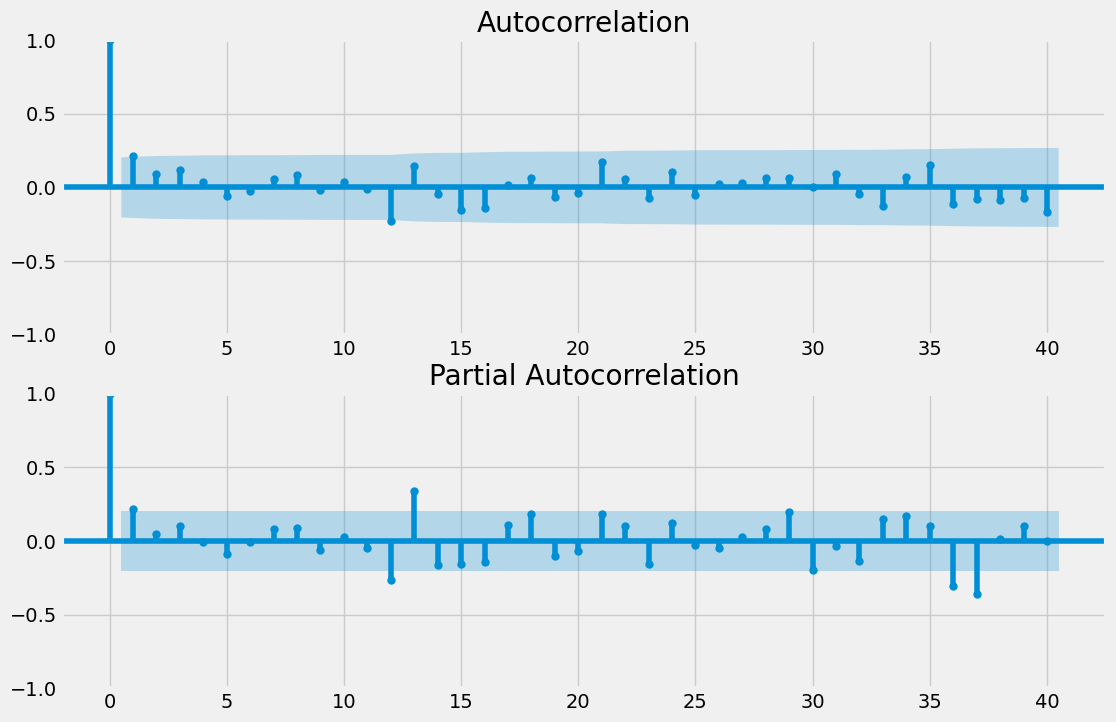

In [34]:
import warnings
warnings.filterwarnings('ignore')

fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)
fig=plot_acf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax1)

ax2=fig.add_subplot(212)
fig=plot_pacf(df['Seasonal first diff'].iloc[13:],lags=40,ax=ax2)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
import warnings
warnings.filterwarnings('ignore')

model=ARIMA(df['Sales'],order=(1,1,1))

In [37]:
model=model.fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 13 Mar 2023   AIC                           1911.627
Time:                        14:05:09   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.315      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
df.shape

(105, 3)

In [40]:
df['Forecast']=model.predict(start=90, end=103,dynamic=True)

In [41]:
df.tail(20)

,Sales,Sale_first_diff,Seasonal first diff,Forecast
Month,,,,
1971-02-01,3162.0,-772.0,263.0,NaN
1971-03-01,4286.0,1124.0,916.0,NaN
1971-04-01,4676.0,390.0,936.0,NaN
1971-05-01,5010.0,334.0,2083.0,NaN
1971-06-01,4874.0,-136.0,888.0,NaN
1971-07-01,4633.0,-241.0,416.0,4977.058155
1971-08-01,1659.0,-2974.0,-79.0,5023.897696
1971-09-01,5951.0,4292.0,730.0,5045.186090
1971-10-01,6981.0,1030.0,557.0,5054.861584


<AxesSubplot:xlabel='Month'>

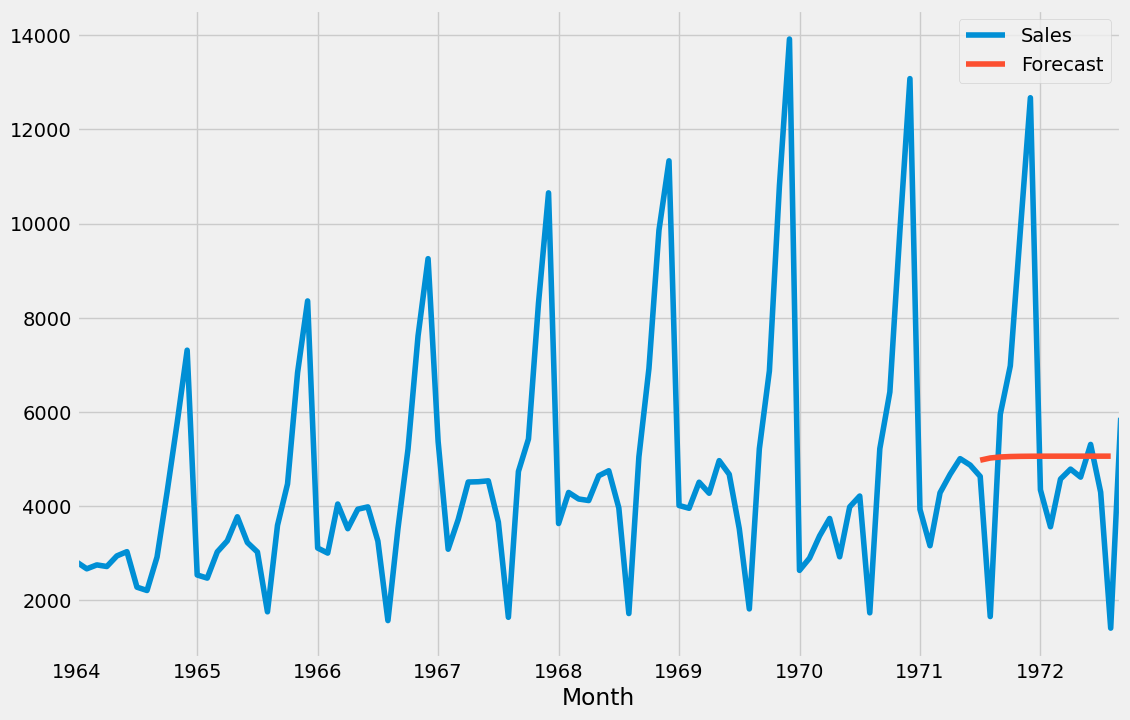

In [42]:
df[['Sales','Forecast']].plot(figsize=(12,8))

In [43]:
import statsmodels.api as sm

In [44]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

In [45]:
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99458D-04

At iterate   15    f=  7.04708D+00    |proj g|=  5.05910D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18437D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.05987D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.97588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

In [46]:
df['Forecast_SARIMAX']=results.predict(start=90,ens=103,dynamic=True)

In [47]:
df.tail(20)

,Sales,Sale_first_diff,Seasonal first diff,Forecast,Forecast_SARIMAX
Month,,,,,
1971-02-01,3162.0,-772.0,263.0,NaN,NaN
1971-03-01,4286.0,1124.0,916.0,NaN,NaN
1971-04-01,4676.0,390.0,936.0,NaN,NaN
1971-05-01,5010.0,334.0,2083.0,NaN,NaN
1971-06-01,4874.0,-136.0,888.0,NaN,NaN
1971-07-01,4633.0,-241.0,416.0,4977.058155,4437.325878
1971-08-01,1659.0,-2974.0,-79.0,5023.897696,2050.747974
1971-09-01,5951.0,4292.0,730.0,5045.186090,5493.376892
1971-10-01,6981.0,1030.0,557.0,5054.861584,6752.038590


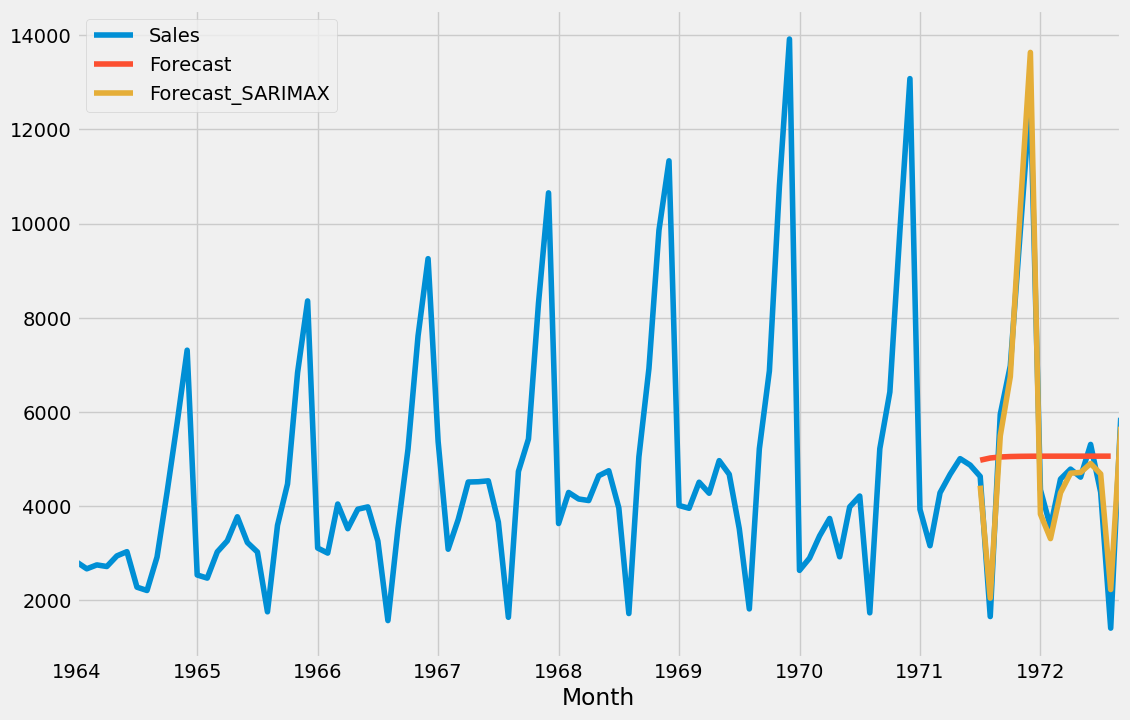

In [48]:
df[['Sales','Forecast','Forecast_SARIMAX']].plot(figsize=(12,8));

In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [51]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [52]:
future_dataset.tail()

,Sales,Sale_first_diff,Seasonal first diff,Forecast,Forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [53]:
future_df=pd.concat([df,future_dataset])

In [54]:
future_df.shape

(128, 5)

In [55]:
future_df['Forecast_SARIMAX2']=results.predict(start=104,end=127,dynamic=True)

<AxesSubplot:>

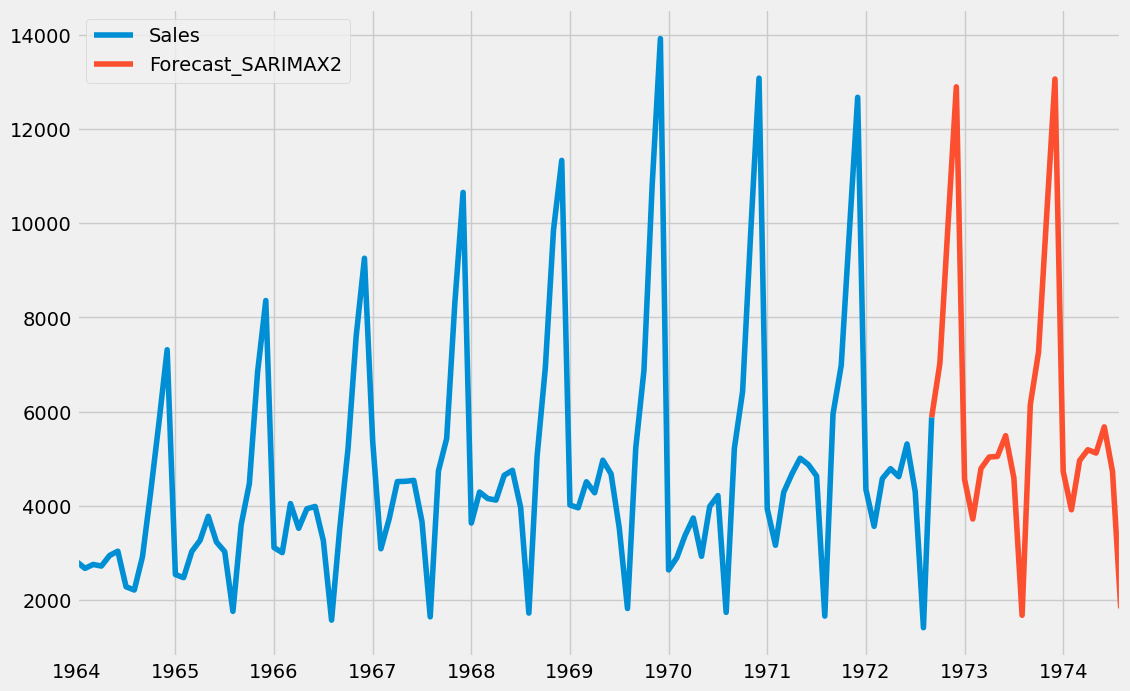

In [56]:
future_df[['Sales','Forecast_SARIMAX2']].plot(figsize=(12,8))